In [20]:
import pandas as pd
import matplotlib.pyplot as plt
df1 = pd.read_csv("Suicide_Rates_Overview_1985_to_2016.csv")
df1.columns = df1.columns.str.strip()
print("Data Overview:\n")
print(df1.head())
print("\nData Count: \n")
print(df1.count())

Data Overview:

   country  year     sex          age  suicides_no  population  \
0  Albania  1987    male  15-24 years           21      312900   
1  Albania  1987    male  35-54 years           16      308000   
2  Albania  1987  female  15-24 years           14      289700   
3  Albania  1987    male    75+ years            1       21800   
4  Albania  1987    male  25-34 years            9      274300   

   suicides/100k pop country-year  HDI for year gdp_for_year ($)  \
0               6.71  Albania1987           NaN    2,156,624,900   
1               5.19  Albania1987           NaN    2,156,624,900   
2               4.83  Albania1987           NaN    2,156,624,900   
3               4.59  Albania1987           NaN    2,156,624,900   
4               3.28  Albania1987           NaN    2,156,624,900   

   gdp_per_capita ($)       generation  
0                 796     Generation X  
1                 796           Silent  
2                 796     Generation X  
3             

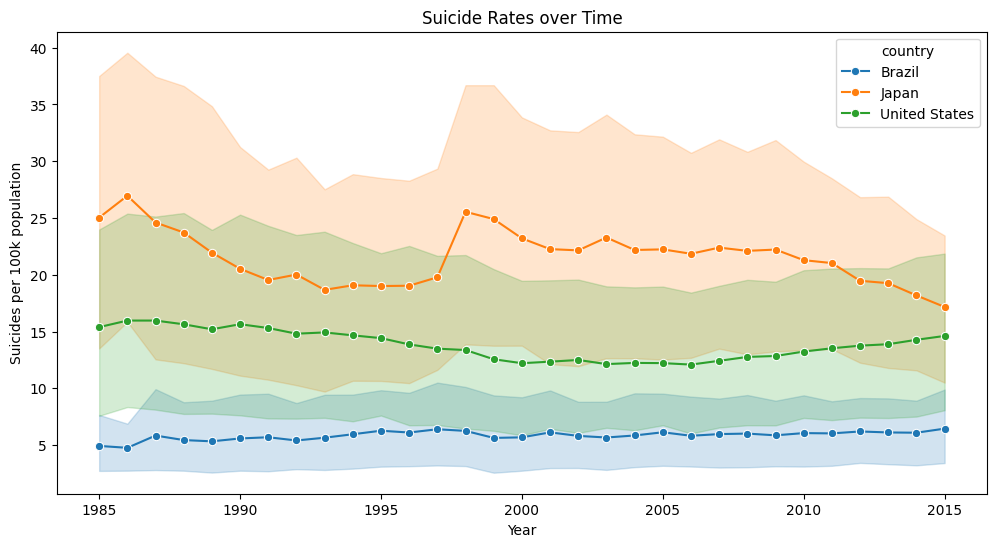

In [21]:
# Pick a few countries to keep the plot readable
countries_to_plot = ["United States", "Japan", "Brazil"]
df_subset = df1[df1["country"].isin(countries_to_plot)]

plt.figure(figsize=(12,6))
sns.lineplot(data=df_subset, x="year", y="suicides/100k pop", hue="country", marker="o")
plt.title("Suicide Rates over Time")
plt.ylabel("Suicides per 100k population")
plt.xlabel("Year")
plt.show()

In [2]:
df1.to_csv("df1_preprocessed.csv", index = False)

In [17]:
# Filter out zeros that are likely missing based on population
suicides_filtered = df1.loc[~((df1["suicides/100k pop"] == 0) & (df1["population"] >= 10000)), "suicides/100k pop"]

suicides_nonzero = df1.loc[df1["suicides/100k pop"] > 0, "suicides/100k pop"]

def print_stats(series, label):
    mean_val = series.mean()
    median_val = series.median()
    mode_val = series.mode().iloc[0] if not series.mode().empty else np.nan
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    min_val = series.min()
    max_val = series.max()
    range_val = max_val - min_val
    variance_val = series.var()
    std_dev_val = series.std()
    
    print(f"\nSuicide per 100k pop. descriptive statistics for {label}:")
    print(f"Mean: {mean_val:.2f}")
    print(f"Median (Q2): {median_val:.2f}")
    print(f"Mode: {mode_val:.2f}")
    print(f"Q1 (25th percentile): {q1:.2f}")
    print(f"Q3 (75th percentile): {q3:.2f}")
    print(f"Min: {min_val:.2f}")
    print(f"Max: {max_val:.2f}")
    print(f"Range: {range_val:.2f}")
    print(f"Variance: {variance_val:.2f}")
    print(f"Standard Deviation: {std_dev_val:.2f}")
    
print_stats(df1['suicides/100k pop'], "all values")
print_stats(suicides_filtered, "filtered zeroes")
print_stats(suicides_nonzero, "nonzeroes")


Suicide per 100k pop. descriptive statistics for all values:
Mean: 12.82
Median (Q2): 5.99
Mode: 0.00
Q1 (25th percentile): 0.92
Q3 (75th percentile): 16.62
Min: 0.00
Max: 224.97
Range: 224.97
Variance: 359.54
Standard Deviation: 18.96

Suicide per 100k pop. descriptive statistics for filtered zeroes:
Mean: 14.22
Median (Q2): 7.37
Mode: 0.00
Q1 (25th percentile): 2.02
Q3 (75th percentile): 18.45
Min: 0.00
Max: 224.97
Range: 224.97
Variance: 378.92
Standard Deviation: 19.47

Suicide per 100k pop. descriptive statistics for nonzeroes:
Mean: 15.15
Median (Q2): 8.26
Mode: 0.29
Q1 (25th percentile): 2.78
Q3 (75th percentile): 19.56
Min: 0.02
Max: 224.97
Range: 224.95
Variance: 389.62
Standard Deviation: 19.74


In [4]:
print("Mean: ", df1['suicides/100k pop'].mean())
print("Median: ", df1['suicides/100k pop'].median())
print("Mode: ", df1['suicides/100k pop'].mode())
mode_val = df1.loc[df1["suicides/100k pop"] != 0, "suicides/100k pop"].mode().iloc[0]
print(mode_val)


Mean:  12.81609741193386
Median:  5.99
Mode:  0    0.0
Name: suicides/100k pop, dtype: float64
0.29


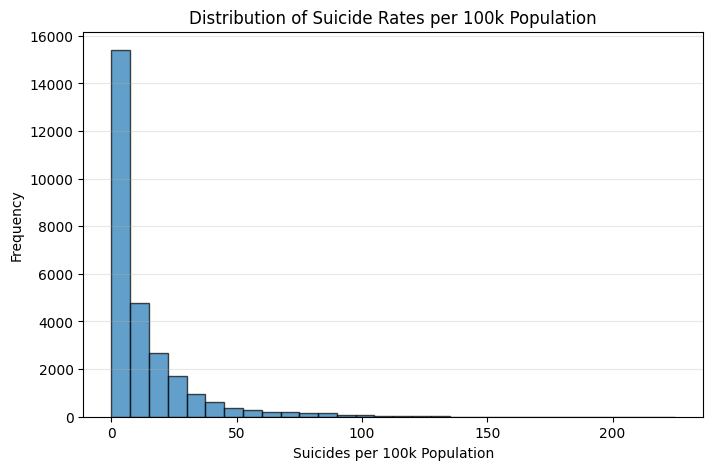

In [5]:
plt.figure(figsize=(8,5))
df1["suicides/100k pop"].plot(kind="hist", bins=30, alpha=0.7, edgecolor="black")
plt.title("Distribution of Suicide Rates per 100k Population")
plt.xlabel("Suicides per 100k Population")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.3)
plt.show()


In [6]:
import numpy as np

# Filter out zeros that are likely missing based on population
suicides_filtered = df1.loc[~((df1["suicides/100k pop"] == 0) & (df1["population"] >= 10000)), "suicides/100k pop"]
mean_val = suicides_filtered.mean()
median_val = suicides_filtered.median()
mode_val = suicides_filtered.mode().iloc[0]  # first mode if multiple
q1 = suicides_filtered.quantile(0.25)
q2 = suicides_filtered.quantile(0.50)
q3 = suicides_filtered.quantile(0.75)
range_val = suicides_filtered.max() - suicides_filtered.min()
variance_val = suicides_filtered.var()
std_dev_val = suicides_filtered.std()
print(f"Mean: {mean_val}")
print(f"Median (Q2): {median_val}")
print(f"Mode: {mode_val}")
print(f"Q1: {q1}")
print(f"Q3: {q3}")
print(f"Range: {range_val}")
print(f"Variance: {variance_val}")
print(f"Standard Deviation: {std_dev_val}")
print_stats(suicides_filtered['suicides/100k pop'], ")

Mean: 14.21682802344591
Median (Q2): 7.37
Mode: 0.0
Q1: 2.02
Q3: 18.45
Range: 224.97
Variance: 378.92139727128415
Standard Deviation: 19.46590345376459


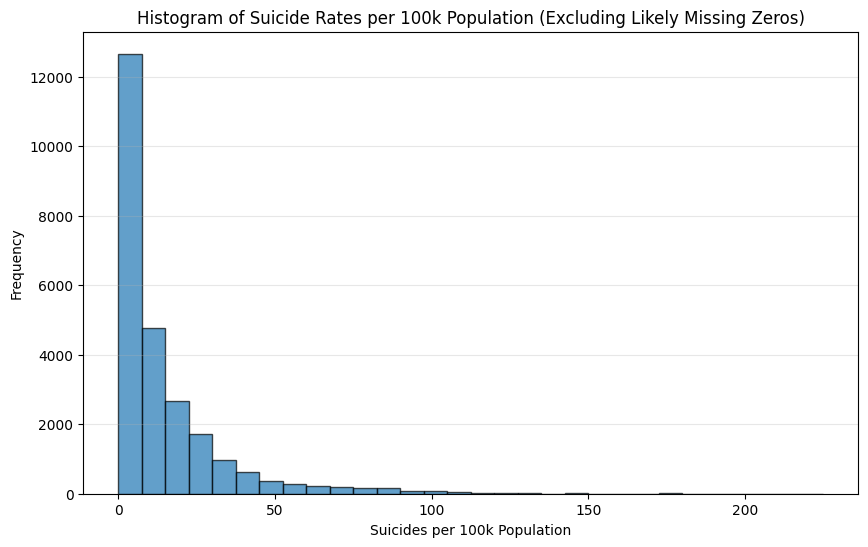

In [7]:
plt.figure(figsize=(10,6))
plt.hist(suicides_filtered, bins=30, edgecolor='black', alpha=0.7)
plt.title("Histogram of Suicide Rates per 100k Population (Excluding Likely Missing Zeros)")
plt.xlabel("Suicides per 100k Population")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.3)
plt.show()

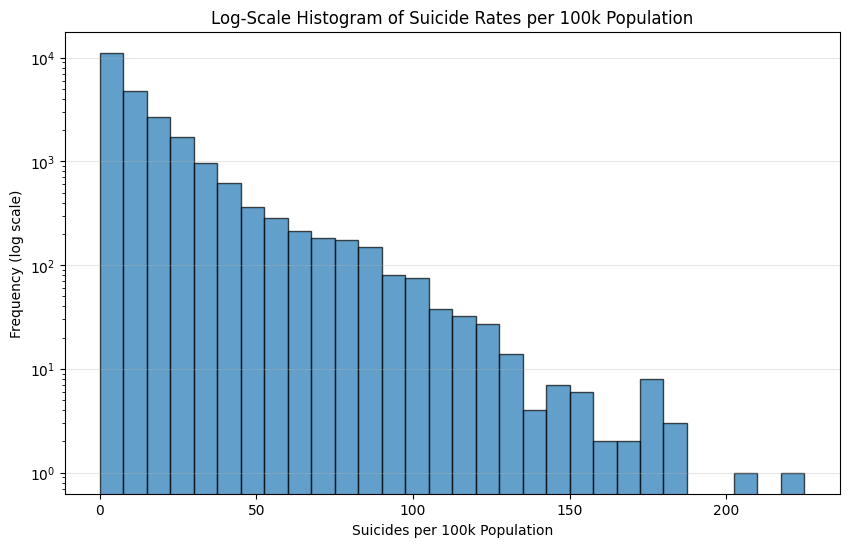

In [8]:
# Small offset to avoid log(0) issues
suicides_filtered_log = suicides_filtered[suicides_filtered > 0]

plt.figure(figsize=(10,6))
plt.hist(suicides_filtered_log, bins=30, edgecolor='black', alpha=0.7, log=True)
plt.title("Log-Scale Histogram of Suicide Rates per 100k Population")
plt.xlabel("Suicides per 100k Population")
plt.ylabel("Frequency (log scale)")
plt.grid(axis='y', alpha=0.3)
plt.show()

Descriptive statistics (nonzero suicide rates):
Mean: 15.15
Median (Q2): 8.26
Mode: 0.29
Q1: 2.78
Q3: 19.56
Range: 224.95
Variance: 389.62
Standard Deviation: 19.74


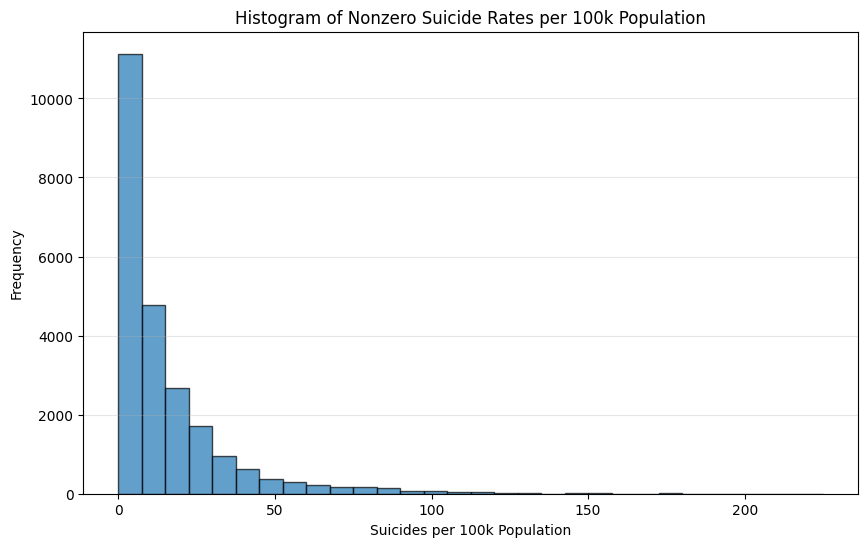

In [9]:
# Filter only nonzero suicide rates
suicides_nonzero = df1.loc[df1["suicides/100k pop"] > 0, "suicides/100k pop"]

# Compute descriptive statistics
mean_val = suicides_nonzero.mean()
median_val = suicides_nonzero.median()
mode_val = suicides_nonzero.mode().iloc[0]  # first mode
q1 = suicides_nonzero.quantile(0.25)
q2 = suicides_nonzero.quantile(0.50)
q3 = suicides_nonzero.quantile(0.75)
range_val = suicides_nonzero.max() - suicides_nonzero.min()
variance_val = suicides_nonzero.var()
std_dev_val = suicides_nonzero.std()

# Print statistics
print("Descriptive statistics (nonzero suicide rates):")
print(f"Mean: {mean_val:.2f}")
print(f"Median (Q2): {median_val:.2f}")
print(f"Mode: {mode_val:.2f}")
print(f"Q1: {q1:.2f}")
print(f"Q3: {q3:.2f}")
print(f"Range: {range_val:.2f}")
print(f"Variance: {variance_val:.2f}")
print(f"Standard Deviation: {std_dev_val:.2f}")

# Plot histogram
plt.figure(figsize=(10,6))
plt.hist(suicides_nonzero, bins=30, edgecolor='black', alpha=0.7)
plt.title("Histogram of Nonzero Suicide Rates per 100k Population")
plt.xlabel("Suicides per 100k Population")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.3)
plt.show()


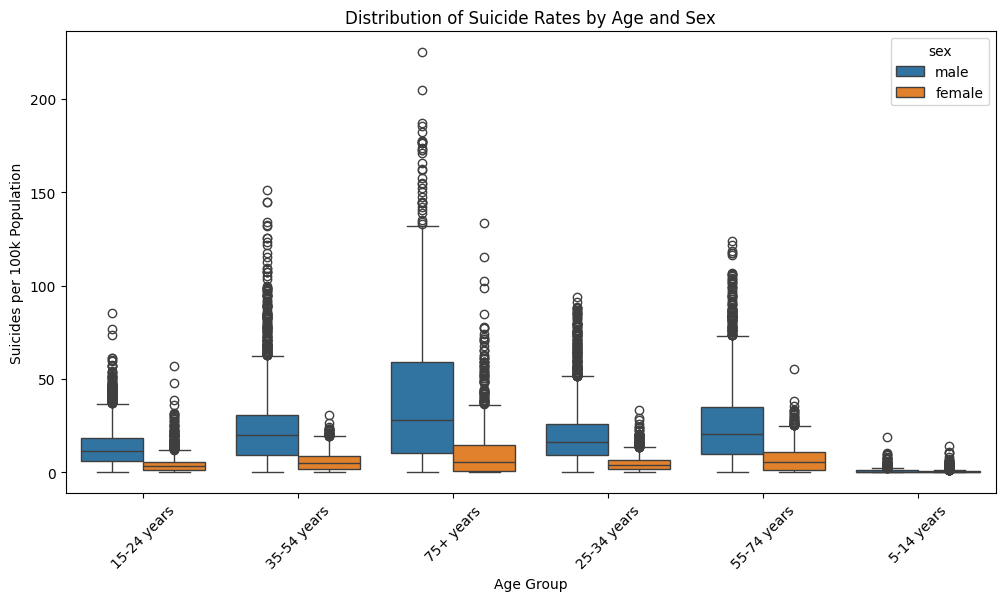

In [10]:
import seaborn as sns

plt.figure(figsize=(12,6))
sns.boxplot(x="age", y="suicides/100k pop", hue="sex", data=df1)
plt.title("Distribution of Suicide Rates by Age and Sex")
plt.ylabel("Suicides per 100k Population")
plt.xlabel("Age Group")
plt.xticks(rotation=45)
plt.show()


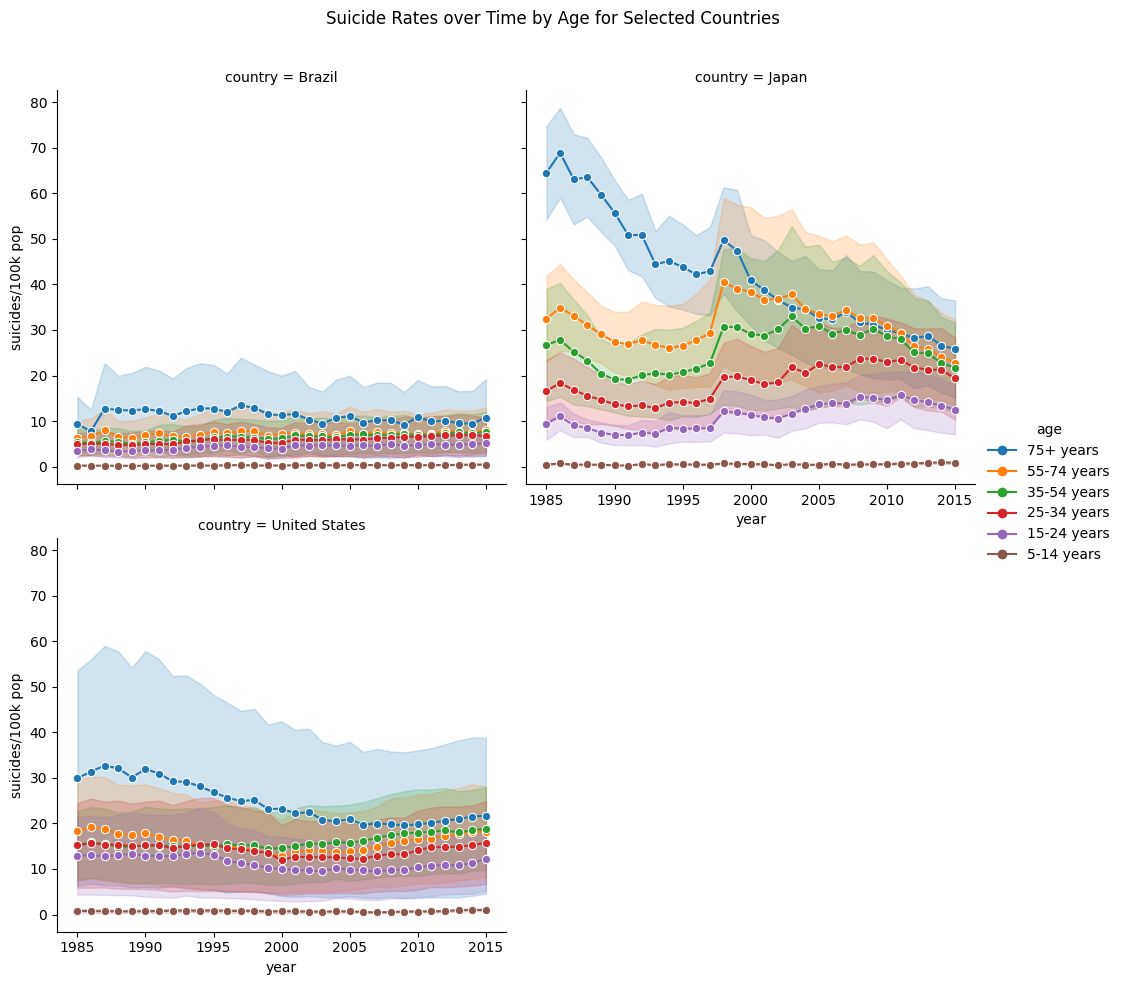

In [11]:
# Example: show trend for a few countries
countries_to_plot = ["United States", "Japan", "Brazil"]
df1_subset = df1[df1["country"].isin(countries_to_plot)]

sns.relplot(
    data=df1_subset,
    x="year",
    y="suicides/100k pop",
    hue="age",
    kind="line",
    col="country",
    col_wrap=2,
    marker="o"
)
plt.subplots_adjust(top=0.9)
plt.suptitle("Suicide Rates over Time by Age for Selected Countries")
plt.show()


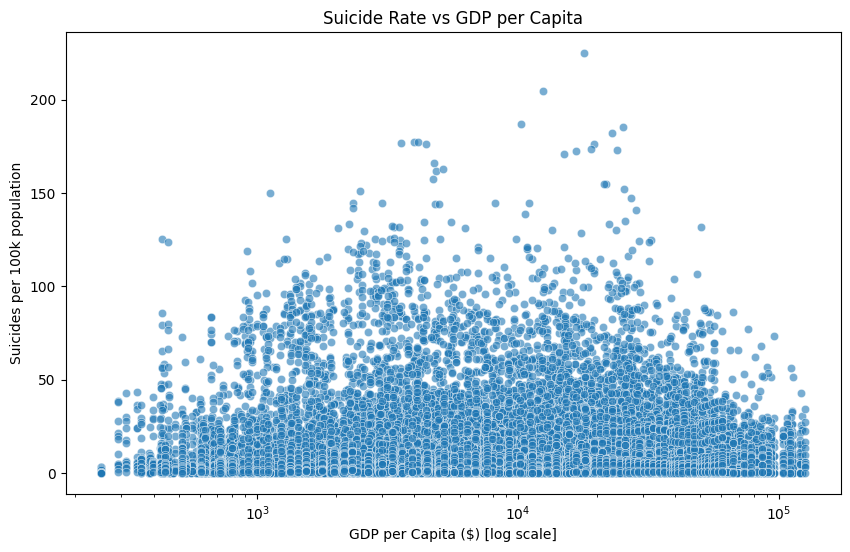

In [25]:

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df1,
    x="gdp_per_capita ($)",
    y="suicides/100k pop",
    alpha=0.6
)
plt.xscale("log")  # helpful if GDP is skewed
plt.title("Suicide Rate vs GDP per Capita")
plt.xlabel("GDP per Capita ($) [log scale]")
plt.ylabel("Suicides per 100k population")
plt.show()

